# Мастер-класс: Exploratory Data Analysis (EDA) — Исследуем мир автомобилей

**Добро пожаловать на детективное расследование в мире данных!**

Сегодня мы будем играть роль аналитика в крупном автомобильном портале. Нам передали большой каталог машин с разными характеристиками и ценами. Наша задача — не просто построить модель, а сначала досконально изучить этот каталог, понять скрытые закономерности и рассказать инсайты, которые помогут бизнесу.

Именно этому процессу — Разведочному анализу данных (EDA) — и посвящен этот мастер-класс.

---

## 📌 Цели этого мастер-класса:

К концу этого занятия вы будете знать и уметь:

1.  **Объяснить**, почему EDA — это фундамент любого проекта Data Science.
2.  **Проводить** первичный осмотр данных: загрузка, оценка размеров, типов данных и пропусков.
3.  **Анализировать** распределения отдельных признаков (столбцов).
4.  **Визуализировать** взаимосвязи между переменными, чтобы находить закономерности.
5.  **Формулировать** гипотезы о том, что влияет на стоимость автомобиля.
6.  **Делать** осмысленные выводы и готовить данные для моделирования.

---

## ❓ Что такое EDA и зачем он нужен?

**Exploratory Data Analysis (EDA)** или Разведочный анализ данных — это процесс "знакомства" с вашими данными. Он включает в себя их визуализацию, вычисление статистик и поиск закономерностей без построения финальных моделей.

**Аналогия:** Представьте, что вам дали ключи от незнакомой машины. Прежде чем отправиться в долгое путешествие, вы проведете осмотр: проверите приборную панель, поймете, где какая педаль, сколько топлива в баке. EDA — это и есть тот самый предварительный осмотр.

### Задачи EDA, которые мы выполним:
*   **Понимание данных:** Что означает `Engine HP`? В чем измеряется `highway MPG`?
*   **Обнаружение аномалий:** Есть ли машины с нулевой мощностью? А с ценой в 10 долларов?
*   **Выявление закономерностей:** Мощность двигателя влияет на расход? Дорогие машины чаще заднеприводные?
*   **Проверка гипотез:** "Чем новее машина, тем она дороже" — это правда?
*   **Подготовка к моделированию:** Решим, как обработать пропуски и какие признаки могут быть полезны для прогноза цены.

> **Главное правило:** Хороший EDA экономит часы бессмысленного тренирования моделей на "грязных" данных.

---

## 🛠 Набор инструментов (Tech Stack)

Для нашего анализа мы вооружимся главными библиотеками Python:

*   `pandas` - наш главный инструмент для работы с таблицами.
*   `numpy` - для математических операций.
*   `matplotlib` и `seaborn` - для создания понятных и красивых графиков.
*   `plotly` (опционально) - для интерактивных визуализаций.

---

## 🗂 О наборе данных

**Название:** Автомобильный каталог (Car Dataset)

**Описание:** Этот dataset содержит разнообразные технические характеристики, атрибуты и рыночную стоимость (MSRP) для различных автомобилей.

**Основная цель анализа:** Исследовать данные, чтобы понять, какие факторы сильнее всего влияют на цену автомобиля (`MSRP`).

**Целевая переменная (Target):** `MSRP` - Рекомендованная производителем розничная цена.

**Признаки (Features):**
*   `Make` - Марка автомобиля (например, BMW, Audi, Ford)
*   `Model` - Конкретная модель
*   `Year` - Год выпуска модели
*   `Engine Fuel Type` - Тип топлива
*   `Engine HP` - Мощность двигателя в лошадиных силах
*   `Engine Cylinders` - Количество цилиндров
*   `Transmission Type` - Тип трансмиссии (АКПП, МКПП и т.д.)
*   `Driven_Wheels` - Привод (передний, задний, полный)
*   `Number of Doors` - Количество дверей
*   `Market Category` - Рыночная ниша (например, "Luxury", "Performance")
*   `Vehicle Size` - Размер автомобиля
*   `Vehicle Style` - Тип кузова
*   `highway MPG` - Расход топлива на трассе (миль на галлон)
*   `city mpg` - Расход топлива в городе (миль на галлон)
*   `Popularity` - Популярность модели (вероятно, на основе каких-то внутренних данных)

---

## 🗺 План нашего анализа

Наше расследование будет состоять из нескольких логических этапов:

1.  **Первичный осмотр:** Загрузим данные и бегло изучим: размер, типы данных, первые и последние строки.
2.  **Предобработка:** Найдем и обработаем пропущенные значения, дубликаты и явные аномалии.
3.  **Анализ отдельных переменных (Univariate Analysis):**
    *   Числовые признаки (`Engine HP`, `city mpg`, `MSRP`): распределения, выбросы.
    *   Категориальные признаки (`Make`, `Transmission Type`): частотность.
4.  **Поиск взаимосвязей (Bivariate Analysis):**
    *   Как мощность (`Engine HP`) связана с ценой (`MSRP`)?
    *   Влияет ли тип привода (`Driven_Wheels`) на расход топлива (`highway MPG`)?
    *   Есть ли разница в цене между разными марками (`Make`)?
5.  **Многомерный анализ:** Попробуем учесть несколько факторов одновременно.
6.  **Формулировка выводов:** Соберем все инсайты воедино и ответим на главный вопрос: "Что делает автомобиль дорогим?".

---

**Наше детективное расследование начинается! Переходите к следующей ячейке, чтобы запустить код и сделать первый шаг.**

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настраиваем визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Для отображения всех колонок
pd.set_option('display.max_columns', None)

In [3]:
# Читаем данные
df = pd.read_csv('data.csv')  # Предполагаем, что файл называется так
print("✅ Данные успешно загружены!")

print(f"Размер dataset: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во колонок: {df.shape[1]}")

✅ Данные успешно загружены!
Размер dataset: (11914, 16)
Кол-во строк: 11914
Кол-во колонок: 16


### 🔍 Шаг 1: Первичный осмотр данных

Давайте посмотрим на "лицо" наших данных - первые несколько строк, чтобы понять их структуру.

### 🔍 Шаг 1: Первичный осмотр данных

**Зачем это нужно делать?**
Первичный осмотр данных — это как знакомство с новым человеком. Прежде чем начать глубокий разговор, вы смотрите на внешний вид, манеры, первые впечатления. В анализе данных это критически важно по нескольким причинам:

1. **📋 Понимание структуры данных**: Мы видим, как организована таблица, какие столбцы присутствуют, как они называются.

2. **🔤 Оценка типов данных**: Сразу понимаем, где у нас числовые данные (целые числа, дроби), а где категориальные (текст, перечисления).

3. **🎯 Первое знакомство с содержанием**: Видим примеры значений в каждом столбце, что помогает понять их смысл без документации.

4. **⚠️ Выявление очевидных проблем**: Уже на этом этапе можем заметить:
   - Странные значения (например, отрицательный возраст)
   - Пропуски (NaN или пустые строки)
   - Несоответствия форматов

5. **📊 Планирование дальнейшего анализа**: Понимаем, какие переменные требуют особого внимания, какие преобразования могут понадобиться.

6. **💡 Формулирование гипотез**: Уже на этом этапе начинают появляться первые вопросы и предположения о данных.

**Проще говоря:** Это быстрая диагностика "здоровья" нашего dataset перед глубоким анализом!

Давайте посмотрим на "лицо" наших данных - первые несколько строк, чтобы понять их структуру.

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
df.tail(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [8]:
# Основная информация о DataFrame
print("📊 ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:")
print("=" * 50)
df.info()

📊 ИНФОРМАЦИЯ О ДАТАФРЕЙМЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  


**Первые наблюдения:**
- Видим смесь числовых и текстовых данных
- `Market Category` содержит несколько значений через запятую - это может потребовать отдельной обработки
- `MSRP` - наша целевая переменная

In [9]:
# Проверим основные статистические показатели числовых колонок
print("📈 ОСНОВНЫЕ СТАТИСТИКИ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:")
print("=" * 60)
df.describe()

📈 ОСНОВНЫЕ СТАТИСТИКИ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### 🔍 Шаг 2: Проверка на пропуски и дубликаты

Теперь проверим качество данных - нет ли пропущенных значений или дубликатов.

**Зачем это нужно делать?**
Проверка качества данных — это как медицинский осмотр перед серьезной тренировкой. Мы должны убедиться, что наши данные "здоровы" и готовы к анализу. Вот почему это критически важно:

## 🚫 **Пропущенные значения (Missing Values)**
**Почему это проблема:**
1. **📉 Искажение статистик**: Средние значения, медианы и другие метрики вычисляются некорректно
2. **❌ Ошибки в алгоритмах**: Большинство ML-моделей не могут работать с пропущенными значениями
3. **📊 Смещение выборки**: Пропуски могут быть не случайными, а системными (например, дорогие автомобили чаще не указывают цену)
4. **💻 Технические ошибки**: Операции с NaN могут приводить к неожиданным результатам

**Что делаем:** Идентифицируем пропуски, анализируем их природу и планируем стратегию обработки.

## 🔄 **Дубликаты (Duplicate Values)**
**Почему это проблема:**
1. **📊 Искажение анализа**: Один и тот же объект учитывается несколько раз
2. **⚖️ Смещение моделей**: Модели переобучаются на повторяющихся примерах
3. **📈 Ложные закономерности**: Создают иллюзию большей значимости некоторых паттернов
4. **🗑️ Пустая трата ресурсов**: Обрабатываем одни и те же данные многократно

**Что делаем:** Находим и удаляем полные дубликаты, проверяем на частичные дубликаты.

## 🎯 **Цель этого этапа:**
- Оценить "чистоту" данных
- Принять обоснованные решения о методах обработки проблем
- Предотвратить ошибки на поздних этапах анализа
- Документировать качество данных для будущих этапов

**Проще говоря:** Мы чистим и подготавливаем "сырье" перед тем, как начать строить из него "здание" анализа!

In [10]:
# Проверяем пропущенные значения
print("🔍 ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print("=" * 45)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Пропущено значений': missing_values,
    'Процент пропусков': missing_percent.round(2)
})

print(missing_info[missing_info['Пропущено значений'] > 0])

if missing_info['Пропущено значений'].sum() == 0:
    print("🎉 Пропущенных значений нет!")

🔍 ПРОВЕРКА НА ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
                  Пропущено значений  Процент пропусков
Engine Fuel Type                   3               0.03
Engine HP                         69               0.58
Engine Cylinders                  30               0.25
Number of Doors                    6               0.05
Market Category                 3742              31.41


In [11]:
# Проверяем на дубликаты
print("🔍 ПРОВЕРКА НА ДУБЛИКАТЫ:")
print("=" * 35)
duplicates = df.duplicated().sum()
print(f"Найдено полных дубликатов: {duplicates}")

if duplicates > 0:
    print("⚠️ Внимание: есть дубликаты, которые нужно удалить!")
else:
    print("✅ Дубликатов нет!")

🔍 ПРОВЕРКА НА ДУБЛИКАТЫ:
Найдено полных дубликатов: 715
⚠️ Внимание: есть дубликаты, которые нужно удалить!


In [12]:
# Посмотрим на уникальные значения в категориальных колонках
print("🎯 УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:")
print("=" * 60)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Уникальных значений: {df[col].nunique()}")
    if df[col].nunique() < 10:  # Показываем все значения если их мало
        print(f"Значения: {df[col].unique()}")
    else:
        print(f"Первые 10 значений: {df[col].unique()[:10]}")

🎯 УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:

Make:
Уникальных значений: 48
Первые 10 значений: ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari']

Model:
Уникальных значений: 915
Первые 10 значений: ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240']

Engine Fuel Type:
Уникальных значений: 10
Первые 10 значений: ['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel'
 'electric' 'flex-fuel (premium unleaded recommended/E85)' 'natural gas'
 'flex-fuel (premium unleaded required/E85)'
 'flex-fuel (unleaded/natural gas)']

Transmission Type:
Уникальных значений: 5
Значения: ['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

Driven_Wheels:
Уникальных значений: 4
Значения: ['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

Market Category:
Уникальных значений: 71
Первые 10 значений: ['

### 📊 Шаг 3: Анализ числовых переменных

Теперь посмотрим на распределение числовых признаков.

**Зачем это нужно делать?**
Анализ числовых переменных — это как изучение жизненно важных показателей пациента. Мы переходим от общего осмотра к глубокой диагностике каждого параметра. Вот почему это исключительно важно:

## 📈 **Понимание распределения данных**
1. **🎯 Нормальность распределения**: Многие статистические методы и ML-алгоритмы предполагают нормальное распределение
2. **📊 Форма распределения**: Симметричное, скошенное (skewed), бимодальное — каждая форма tells a story
3. **📏 Масштаб значений**: Понимаем диапазон данных для корректного масштабирования

## 🚨 **Выявление выбросов (Outliers)**
1. **🔍 Поиск аномалий**: Значения, которые значительно отличаются от основной массы данных
2. **⚖️ Оценка влияния**: Выбросы могут сильно влиять на средние значения и модели
3. **❓ Анализ природы**: Ошибка измерения? Редкое, но реальное явление?

## 📋 **Оценка центральных тенденций и разброса**
1. **📍 Центр распределения**: Среднее vs Медиана — что лучше описывает "типичное" значение?
2. **📐 Разброс данных**: Насколько переменные изменчивы? (дисперсия, стандартное отклонение, IQR)
3. **📊 Квартили и перцентили**: Понимание как распределены значения

## 🎯 **Подготовка к дальнейшему анализу**
1. **⚙️ Выбор методов обработки**: Решаем как масштабировать, нормализовать, преобразовывать данные
2. **🤖 Подготовка для ML-моделей**: Многие алгоритмы чувствительны к распределению данных
3. **📊 Планирование визуализаций**: Выбираем подходящие типы графиков

## 💡 **Формулирование гипотез**
1. **🔍 Поиск закономерностей**: На этом этапе рождаются первые инсайты
2. **❓ Вопросы для исследования**: Почему распределение скошено? Что вызывают выбросы?
3. **🎯 Приоритизация переменных**: Какие признаки могут быть наиболее важными?

**Проще говоря:** Мы изучаем "анатомию" наших числовых данных — их структуру, аномалии и особенности, чтобы принимать обоснованные решения на каждом следующем шаге анализа!

Теперь посмотрим на распределение числовых признаков.

In [13]:
# Выберем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("🔢 ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ:")
print(numeric_cols.tolist())

🔢 ЧИСЛОВЫЕ ПЕРЕМЕННЫЕ:
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


📊 РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:


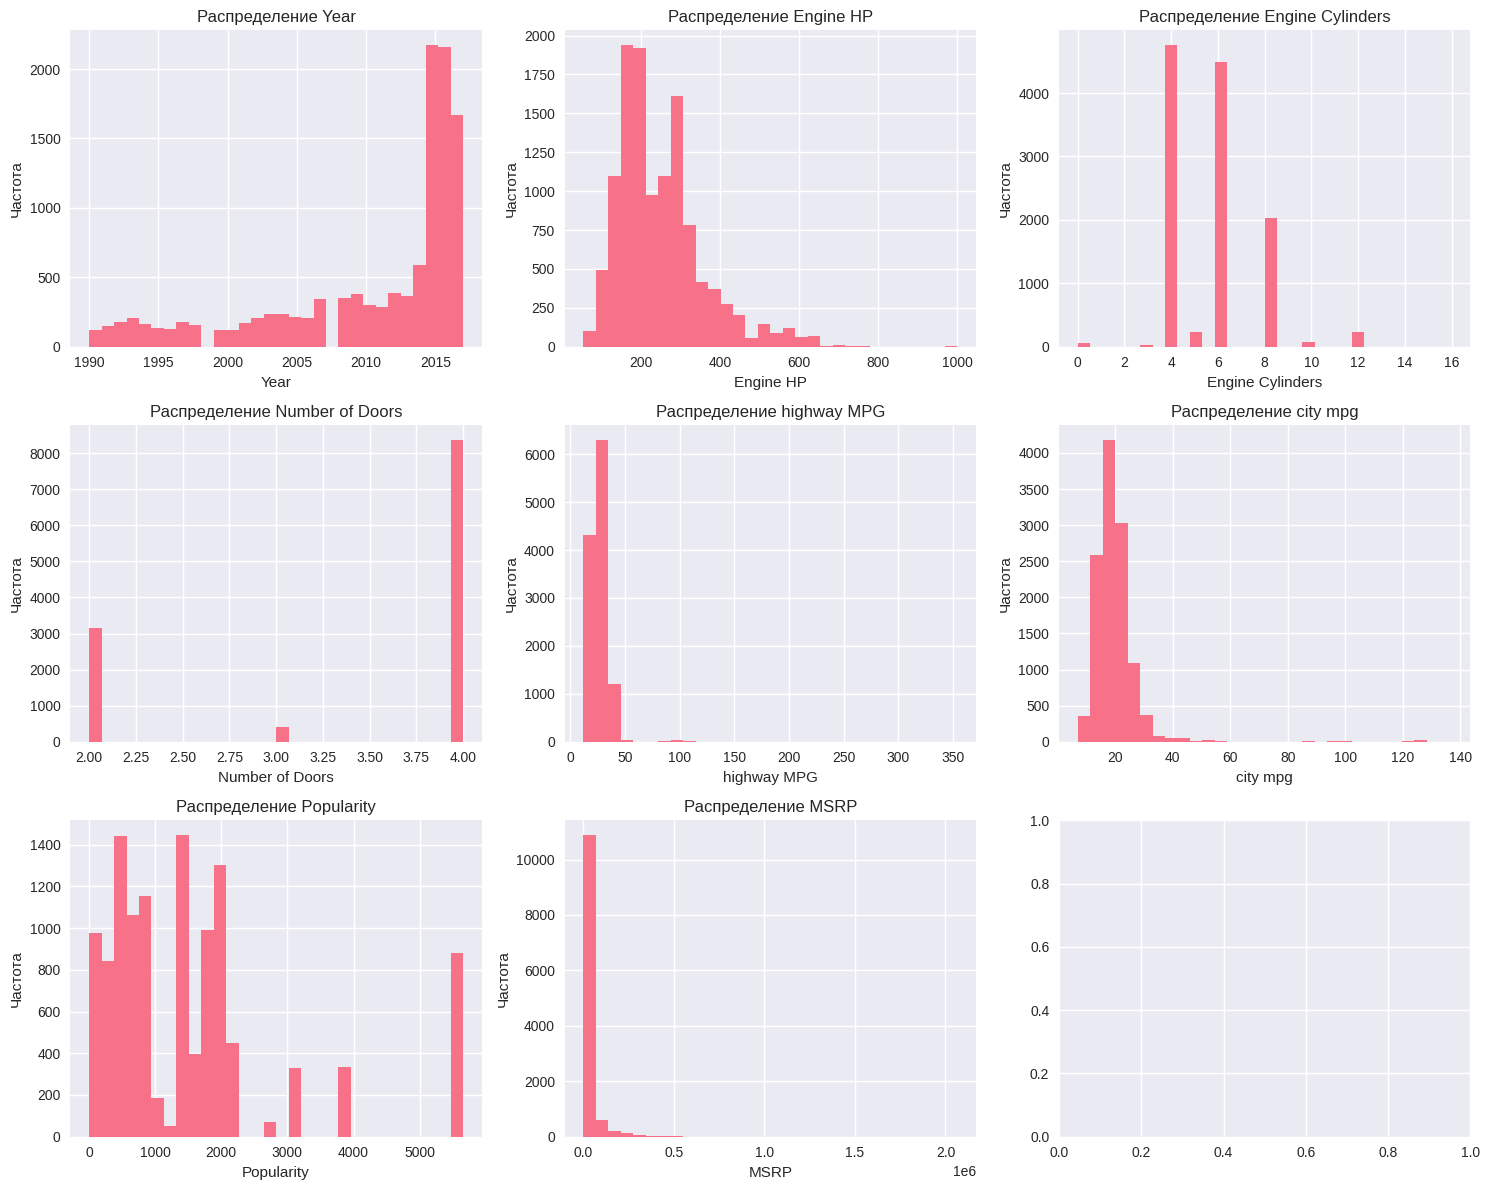

In [19]:
# Построим гистограммы для числовых переменных
print("📊 РАСПРЕДЕЛЕНИЕ ЧИСЛОВЫХ ПЕРЕМЕННЫХ:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < 8:  # Ограничиваем количество графиков
        df[col].hist(bins=30, ax=axes[i])
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

### 📊 Теоретическая сводка: Метод IQR для обнаружения и обработки выбросов

#### 📐 Что такое метод IQR?
**IQR (Interquartile Range)** — межквартильный размах, это мера статистической дисперсии, равная разнице между 75-м и 25-м перцентилями. Формула:
$$
IQR = Q_3 - Q_1
$$
где:
- $Q_1$ - первый квартиль (25-й перцентиль)
- $Q_3$ - третий квартиль (75-й перцентиль)

#### 🎯 Как определяются выбросы?
Выбросы определяются с помощью "усов" (whiskers):
- **Нижняя граница**: $Q_1 - 1.5 \times IQR$
- **Верхняя граница**: $Q_3 + 1.5 \times IQR$

Любое значение, выходящее за эти границы, считается выбросом.

#### 📊 Почему именно 1.5?
Коэффициент 1.5 был предложен Джоном Тьюки и имеет статистическое обоснование:
- Для нормального распределения: ±1.5IQR включает ≈99.3% данных
- Это эмпирическое правило, хорошо работающее на практике
- Для более строгого отбора можно использовать 3.0 вместо 1.5

#### 🎯 Типы выбросов по методу IQR:
1. **Мягкие выбросы** (Mild outliers):
   - Между 1.5IQR и 3IQR от квартилей
   - Часто являются естественной частью распределения

2. **Экстремальные выбросы** (Extreme outliers):
   - За пределами 3IQR от квартилей
   - Чаще требуют особого внимания

#### ⚠️ Когда метод IQR эффективен?
- ✅ Для симметричных и умеренно скошенных распределений
- ✅ Когда данные не следуют нормальному распределению
- ✅ Для обнаружения выбросов в одномерном анализе

#### ❌ Ограничения метода:
- Не работает для многомерных выбросов
- Может быть чувствителен к сильно скошенным распределениям
- Не учитывает природу данных и предметную область

#### 🛠️ Стратегии обработки выбросов:

##### 1. **Удаление** (удаляем строки с выбросами)
```python
# Удаление выбросов для конкретной колонки
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

📦 ЯЩИКИ С УСАМИ ДЛЯ ВЫЯВЛЕНИЯ ВЫБРОСОВ:


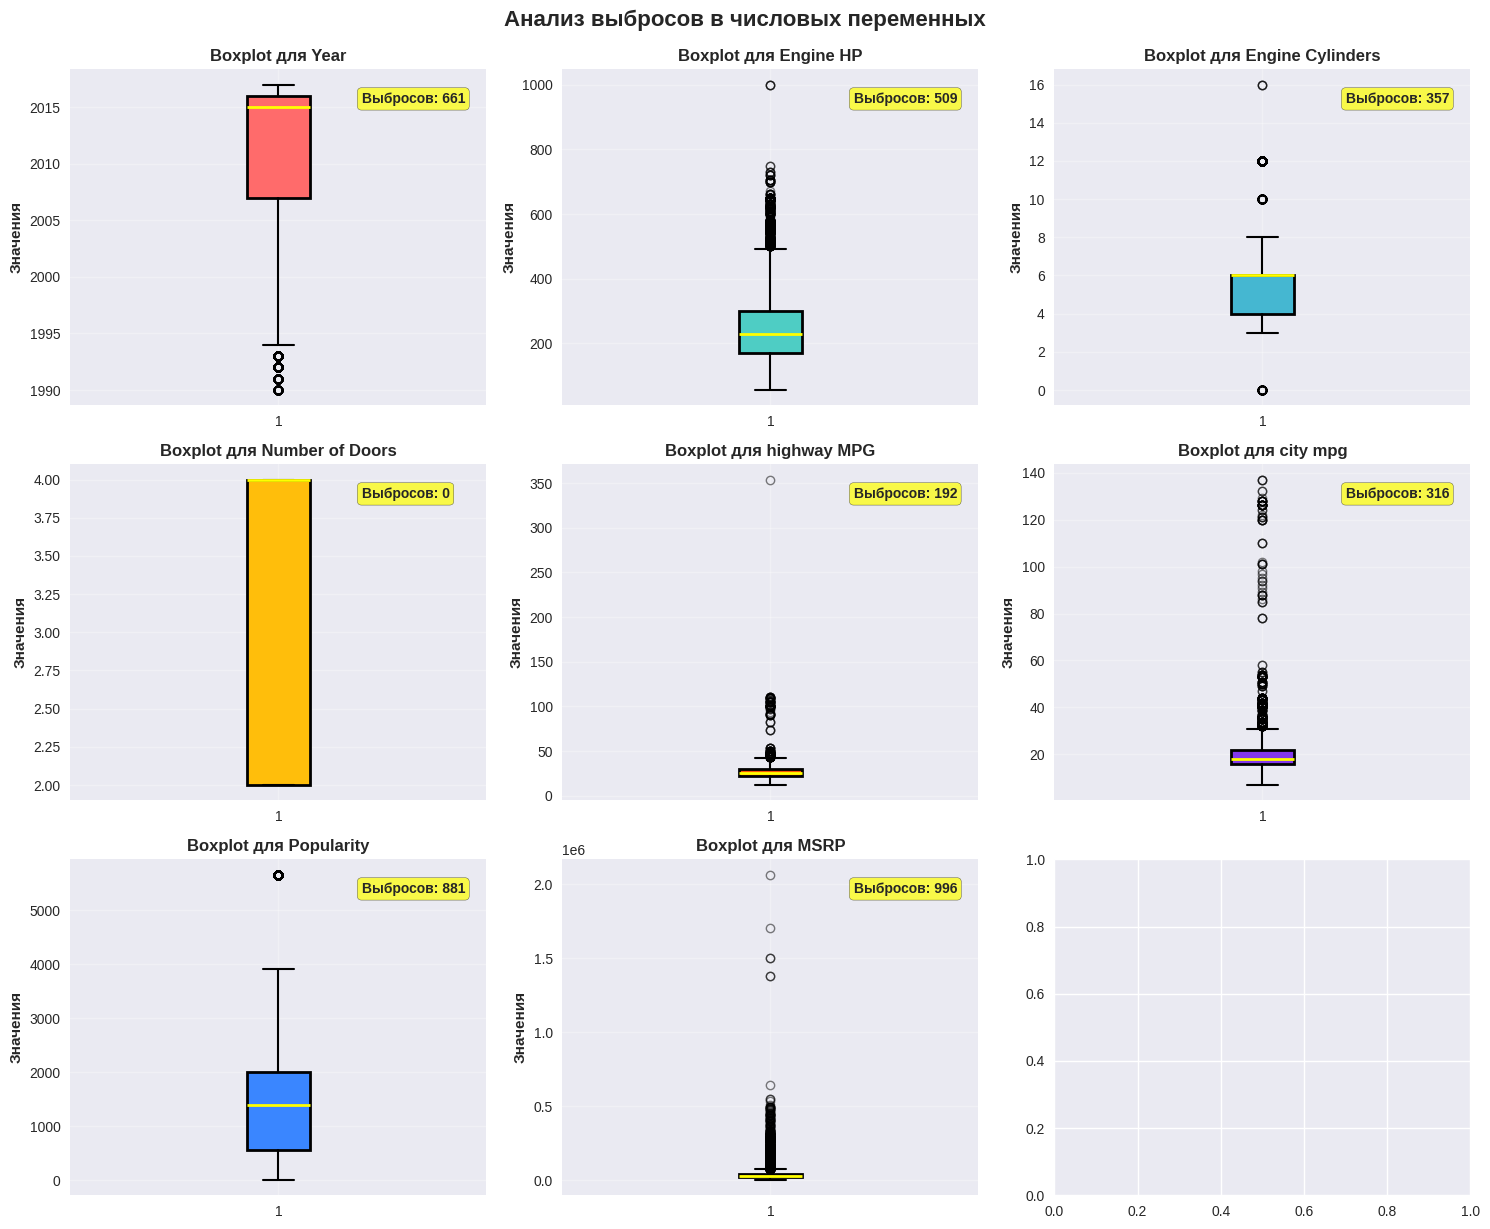

In [24]:
# Ящики с усами (boxplots) для выявления выбросов с ярким цветом
print("📦 ЯЩИКИ С УСАМИ ДЛЯ ВЫЯВЛЕНИЯ ВЫБРОСОВ:")
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

# Яркие цвета для лучшей видимости
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFBE0B', '#FB5607', '#8338EC', '#3A86FF', '#FF006E', '#38B000']

for i, col in enumerate(numeric_cols):
    if i < 9:
        # Создаем boxplot с ярким цветом
        boxplot = axes[i].boxplot(df[col].dropna(),
                                 patch_artist=True,
                                 boxprops=dict(facecolor=colors[i], color='black', linewidth=2),
                                 medianprops=dict(color='yellow', linewidth=2),
                                 whiskerprops=dict(color='black', linewidth=1.5),
                                 capprops=dict(color='black', linewidth=1.5),
                                 flierprops=dict(marker='o', color='red', alpha=0.5, markersize=6))

        axes[i].set_title(f'Boxplot для {col}', fontweight='bold', fontsize=12)
        axes[i].set_ylabel('Значения', fontweight='bold')
        axes[i].grid(True, alpha=0.3)

        # Добавляем аннотацию с количеством выбросов
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        axes[i].annotate(f'Выбросов: {len(outliers)}',
                        xy=(0.7, 0.9), xycoords='axes fraction',
                        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7),
                        fontweight='bold')

plt.tight_layout()
plt.suptitle('Анализ выбросов в числовых переменных', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [25]:
# Дополнительно: сводная информация по выбросам
print("📊 СВОДНАЯ ИНФОРМАЦИЯ ПО ВЫБРОСАМ:")
print("=" * 40)

outliers_summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    outliers_percent = (outliers_count / len(df)) * 100

    outliers_summary.append({
        'Переменная': col,
        'Выбросов': outliers_count,
        'Процент': f'{outliers_percent:.1f}%',
        'Нижняя граница': f'{lower_bound:.2f}',
        'Верхняя граница': f'{upper_bound:.2f}'
    })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.to_string(index=False))

📊 СВОДНАЯ ИНФОРМАЦИЯ ПО ВЫБРОСАМ:
      Переменная  Выбросов Процент Нижняя граница Верхняя граница
            Year       661    5.5%        1993.50         2029.50
       Engine HP       509    4.3%         -25.00          495.00
Engine Cylinders       357    3.0%           1.00            9.00
 Number of Doors         0    0.0%          -1.00            7.00
     highway MPG       192    1.6%          10.00           42.00
        city mpg       316    2.7%           7.00           31.00
      Popularity       881    7.4%       -1641.00         4199.00
            MSRP       996    8.4%      -10846.88        74078.12


### 🎯 Шаг 4: Анализ категориальных переменных

Посмотрим на распределение категориальных признаков.

**Зачем это нужно делать?**
Анализ категориальных переменных — это как изучение демографической структуры населения. Мы переходим от количественных измерений к качественным характеристикам, которые часто несут ключевые инсайты. Вот почему это критически важно:

## 🏷️ **Понимание структуры категорий**
1. **🔤 Уникальные значения**: Сколько различных категорий существует в каждом признаке?
2. 📊 **Частотность распределения**: Какие категории наиболее распространены, а какие редки?
3. ⚖️ **Баланс классов**: Сбалансированы ли категории или есть доминирующие классы?

## 🎯 **Выявление особенностей данных**
1. 🔍 **Редкие категории**: Категории с малым количеством наблюдений могут создавать проблемы для моделей
2. 🏷️ **Иерархия и взаимосвязи**: Понимание естественной структуры категорий (например, виды автомобилей)
3. 📝 **Качество данных**: Обнаружение опечаток, различных написаний одного понятия

## 📊 **Подготовка к feature engineering**
1. 🔄 **Кодирование категориальных переменных**: Выбор между One-Hot Encoding, Label Encoding, Target Encoding
2. 🎯 **Группировка редких категорий**: Объединение малых групп в "Другие"
3. 📈 **Создание новых признаков**: Выделение наиболее информативных категорий

## 🤖 **Важность для ML-моделей**
1. ❌ **Обработка для алгоритмов**: Большинство моделей не работают с текстовыми данными напрямую
2. 📊 **Информативность признаков**: Какие категориальные переменные могут быть наиболее predictive?
3. ⚖️ **Избежание bias**: Балансировка категорий для точности моделей

## 💡 **Бизнес-инсайты и интерпретируемость**
1. 🎯 **Ключевые сегменты**: Какие категории наиболее значимы для целевой переменной?
2 📊 **Паттерны и тренды**: Как распределяются категории во времени или по другим измерениям?
3. 🔍 **Аномалии и выбросы**: Неожиданные распределения могут указывать на проблемы данных

**Проще говоря:** Мы изучаем "качественную ДНК" наших данных — те характеристики, которые нельзя измерить числами, но которые часто определяют поведение и закономерности в данных!

Посмотрим на распределение категориальных признаков.

📊 РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:


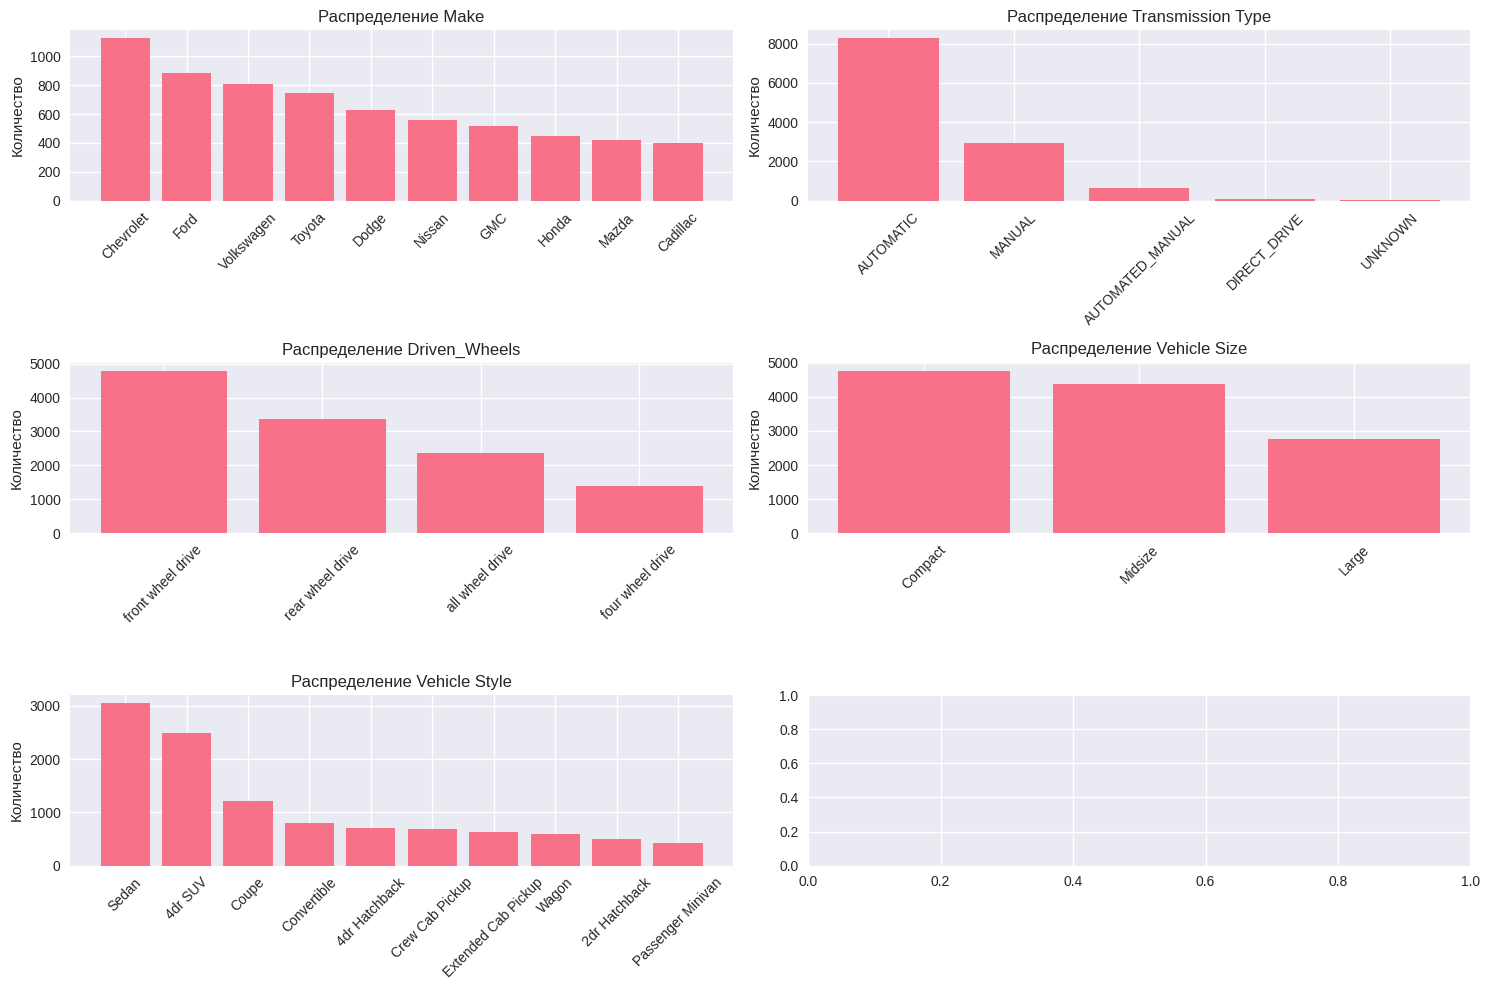

In [31]:
# Анализ категориальных переменных
print("📊 РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПЕРЕМЕННЫХ:")

categorical_to_analyze = ['Make', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_to_analyze):
    if i < 5 and col in df.columns:
        value_counts = df[col].value_counts()
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)  # Ограничиваем топ-10
        axes[i].bar(value_counts.index, value_counts.values)
        axes[i].set_title(f'Распределение {col}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_ylabel('Количество')

plt.tight_layout()
plt.show()

### 🔗 Шаг 5: Корреляционный анализ

Проверим, как переменные связаны между собой и с целевой переменной MSRP.

**Зачем это нужно делать?**
Корреляционный анализ — это как составление карты взаимосвязей между переменными. Это один из самых важных этапов EDA, который помогает нам:

## 🎯 **Основные цели корреляционного анализа:**
1. **🔍 Поиск взаимосвязей**: Обнаружение переменных, которые движутся вместе
2. **🎯 Отбор признаков**: Выбор наиболее информативных переменных для модели
3. **⚠️ Обнаружение мультиколлинеарности**: Выявление сильно коррелированных предикторов
4. **💡 Генерация гипотез**: Понимание структуры данных и скрытых зависимостей
5. **📊 Интерпретируемость**: Упрощение понимания сложных взаимосвязей

## 🤖 **Важность для машинного обучения:**
- Улучшение производительности моделей
- Сокращение размерности данных
- Предотвращение переобучения
- Ускорение обучения моделей

---

## 📚 **Теоретическая сводка по корреляции:**

### 📊 **Что такое корреляция?**
Корреляция — статистическая мера, показывающая степень линейной зависимости между двумя переменными.

### 📈 **Коэффициент корреляции Пирсона (r):**
- **Диапазон значений**: от -1 до +1
- **Формула**:   $$
  r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
  $$
  где:
  - $x_i$, $y_i$ - отдельные значения переменных
  - $\bar{x}$, $\bar{y}$ - средние значения переменных
  - $\sum$ - сумма по всем наблюдениям


### 🎯 **Интерпретация значений:**
| Значение | Интерпретация | Визуальное представление |
|----------|---------------|--------------------------|
| **+1.0** | Полная положительная линейная зависимость | ↗️ Прямая линия вверх |
| **+0.7 до +0.9** | Сильная положительная корреляция | ↗️ Крутой восходящий тренд |
| **+0.4 до +0.6** | Умеренная положительная корреляция | ↗️ Восходящий тренд |
| **+0.1 до +0.3** | Слабая положительная корреляция | ↗️ Слабый восходящий тренд |
| **0.0** | Отсутствие линейной зависимости | ➡️ Беспорядочное облако точек |
| **-0.1 до -0.3** | Слабая отрицательная корреляция | ↘️ Слабый нисходящий тренд |
| **-0.4 до -0.6** | Умеренная отрицательная корреляция | ↘️ Нисходящий тренд |
| **-0.7 до -0.9** | Сильная отрицательная корреляция | ↘️ Крутой нисходящий тренд |
| **-1.0** | Полная отрицательная линейная зависимость | ↘️ Прямая линия вниз |

### ⚠️ **Важные ограничения:**
1. **📏 Линейность**: Корреляция измеряет только линейные зависимости
2. **🔀 Причина и следствие**: Корреляция ≠ причинно-следственная связь
3. **🎯 Выбросы**: Чувствительна к выбросам
4. **📊 Нелинейные связи**: Может пропускать сложные нелинейные зависимости

### 💡 **Практическое применение:**
- **> |0.7|**: Сильная корреляция — возможно, нужно удалить один из признаков
- **0.4-0.7**: Умеренная корреляция — полезно для анализа
- **< |0.2|**: Слабая корреляция — малая информативность

**Проще говоря:** Мы создаем "карту отношений" между переменными, чтобы понять, кто с кем "дружит" и как эти отношения могут помочь нам в предсказании целевой переменной!

Проверим, как переменные связаны между собой и с целевой переменной MSRP.

📈 МАТРИЦА КОРРЕЛЯЦИЙ:


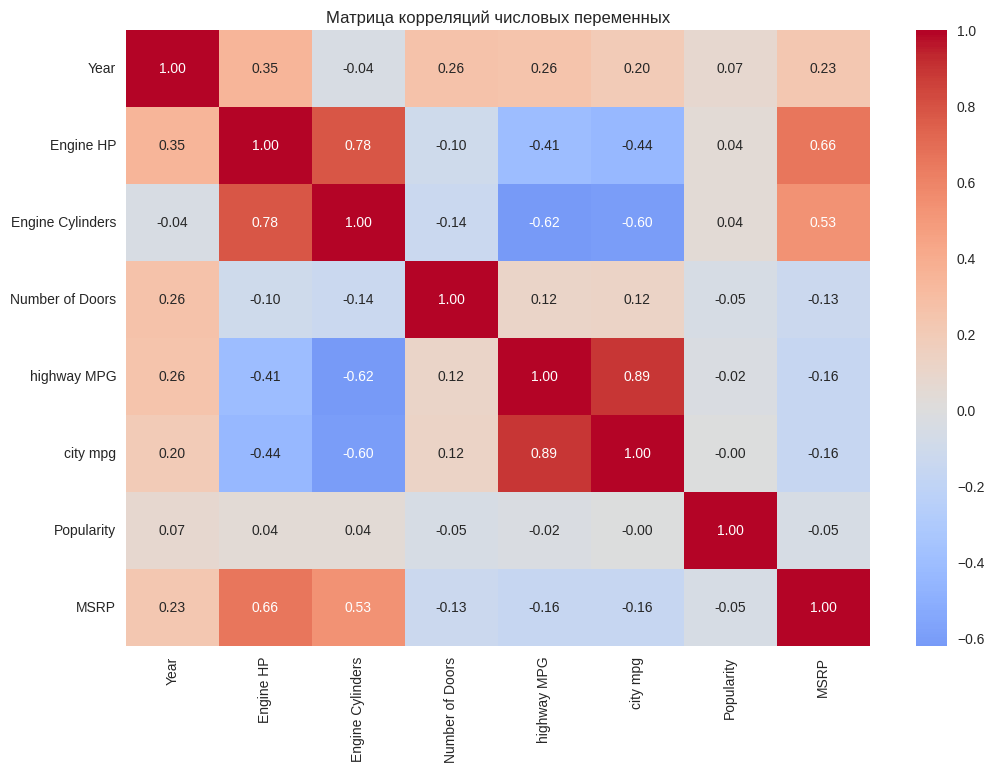

In [32]:
# Матрица корреляций
print("📈 МАТРИЦА КОРРЕЛЯЦИЙ:")
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций числовых переменных')
plt.show()

In [33]:
# Корреляция с целевой переменной MSRP
print("🎯 КОРРЕЛЯЦИЯ ПЕРЕМЕННЫХ С MSRP:")
msrp_corr = correlation_matrix['MSRP'].sort_values(ascending=False)
print(msrp_corr)

🎯 КОРРЕЛЯЦИЯ ПЕРЕМЕННЫХ С MSRP:
MSRP                1.000000
Engine HP           0.662008
Engine Cylinders    0.531312
Year                0.227590
Popularity         -0.048476
Number of Doors    -0.126635
city mpg           -0.157676
highway MPG        -0.160043
Name: MSRP, dtype: float64


### 💡 Первые выводы и следующие шаги:

На основе первоначального анализа мы можем сделать следующие наблюдения:

1. **Качество данных**:


2. **Числовые переменные**:


3. **Следующие шаги**:


## 🎯 Практические задания для самопроверки

### 📋 Задание 1: Базовые операции с DataFrame
**Цель:** Освоить базовые методы фильтрации и сортировки данных.

```python
# 1. Найди все автомобили Audi
audi_cars =

# 2. Найди автомобили с ценой (MSRP) менее 25000
cheap_cars =

# 3. Отсортируй данные по цене по убыванию
sorted_by_price =

# 4. Найди все автомобили с механической коробкой передач (MANUAL)
manual_cars =

###📊 Задание 2: Создание новых колонок
**Цель:** Научиться создавать и преобразовывать признаки.

```python
# 1. Создай колонку 'Age' (возраст автомобиля), предположив текущий год
df['Age']

# 2. Создай колонку 'Price_Per_HP' (цена за лошадиную силу)
df['Price_Per_HP'] =

# 3. Создай бинарную колонку 'Is_Luxury' (является ли автомобиль люксовым)
df['Is_Luxury'] =

# 4. Создай колонку 'Fuel_Efficiency_Avg' (средний расход топлива)
df['Fuel_Efficiency_Avg'] =

###🔍 Задание 3: Комплексная фильтрация
**Цель:** Научиться комбинировать условия фильтрации.

```python
# 1. Найди все заднеприводные (rear wheel drive) автомобили с ценой > 30000
expensive_rwd =

# 2. Найди автомобили Audi или FIAT с пробегом на трассе > 30 MPG
efficient_german_italian =

# 3. Найди автомобили с 4 цилиндрами ИЛИ ценой < 20000
cheap_or_efficient =

# 4. Найди все не люксовые автомобили с автоматической коробкой
non_luxury_auto =



###📈 Задание 4: Агрегация и группировка
**Цель:** Освоить методы агрегации данных.

```python
# 1. Посчитай среднюю цену для каждого производителя (Make)
mean_price_by_make =

# 2. Найди максимальную мощность двигателя для каждого типа привода
max_hp_by_drive =

# 3. Посчитай количество автомобилей каждого года выпуска
cars_per_year =

# 4. Найди средний расход топлива в городе для каждого размера автомобиля
avg_city_mpg_by_size =

###🎓 Задание 5: Анализ выбросов и аномалий

**Цель:** Научиться находить и анализировать аномалии в данных.

```python
# 1. Найди автомобили с аномально низкой ценой (< 1000)
suspiciously_cheap =

# 2. Найди автомобили с необычно высоким расходом топлива (city mpg < 5)
gas_guzzlers =

# 3. Найди автомобили где мощность не соответствует количеству цилиндров
# (например, очень низкая мощность для многих цилиндров)
low_power_for_cylinders =

# 4. Проверь, есть ли автомобили с одинаковыми характеристиками но разной ценой
duplicate_cars =

###💡 Задание 6: Создание сложных признаков

**Цель:** Развить навыки feature engineering.

```python
# 1. Создай колонку 'Performance_Ratio' (отношение мощности к весу, если бы был вес)

# Предположи, что вес пропорционален размеру и количеству дверей
df['Performance_Ratio'] =

# 2. Создай категориальную колонку 'Era' (эпоха автомобиля)

df['Era'] =

# 3. Создай колонку 'Is_Performance' на основе нескольких условий

df['Is_Performance'] =

# 4. Создай колонку 'Fuel_Type_Simple' (упрощенный тип топлива)
df['Fuel_Type_Simple'] =